# MODEL Validation code

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 394us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 123us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 132us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1630 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 135us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 133us/step - loss: 2.1177 - acc: 0.1914 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 133us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 135us/step - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0727 - val_acc: 0.2067
Ep

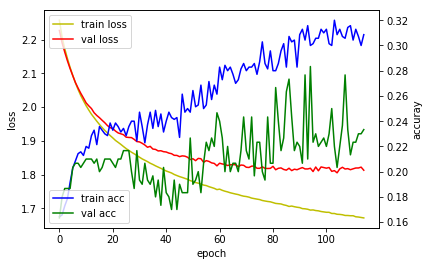

In [4]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
es=EarlyStopping(patience=10) # 조기 종료하는 콜백함수 객체 # patience옵션은 성능 개선이 안되더라도, 훈련을 더 실행할지에 대한 크기를 설정해주는 옵션
hist = model.fit(X_train, Y_train, callbacks=[es], epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Stacked RNN

In [108]:
sentence=("The regret after not doing something is bigger than that of doing something "
            "Ability is decided by one's own effort "
            "The difficulty in life is the choice.")

sentence

"The regret after not doing something is bigger than that of doing something Ability is decided by one's own effort The difficulty in life is the choice."

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn

In [0]:
tf.reset_default_graph()

In [110]:
set(sentence)
charSet=list(set(sentence))
charDict={w:i for i,w in enumerate(charSet)}
charDict

{' ': 13,
 "'": 18,
 '.': 1,
 'A': 5,
 'T': 16,
 'a': 14,
 'b': 17,
 'c': 6,
 'd': 3,
 'e': 2,
 'f': 22,
 'g': 11,
 'h': 23,
 'i': 0,
 'l': 12,
 'm': 15,
 'n': 20,
 'o': 21,
 'r': 4,
 's': 8,
 't': 9,
 'u': 19,
 'w': 10,
 'y': 7}

In [111]:
len(charDict) 

24

In [0]:
data_dim=len(charDict) # input_dim=24차원
num_classes=hidden_size=data_dim
sequence_length=10
learning_rate=0.1

In [124]:
len(sentence) #152글자

datax=[]
datay=[]
for i in range(0,len(sentence)-sequence_length): #(0,152-10)=>(0,142) 마지막 10글자 학습부터는 142번부터~
  xstr=sentence[i:i+sequence_length] #0-9번까지
  ystr=sentence[i+1:i+sequence_length+1] #2~11번까지
#   print(i,xstr,'->',ystr)
  x= [charDict[c] for c in xstr]
  y= [charDict[c] for c in ystr]
  
#   print(x)
#   print(y)

  datax.append(x)
  datay.append(y)
  
batch_size=len(datax) #142

x=tf.placeholder(tf.int32, shape=[None,sequence_length])
y=tf.placeholder(tf.int32, shape=[None,sequence_length])

x_one_hot=tf.one_hot(x, num_classes) 
print(x_one_hot)

def lstm_cell():
  cell=rnn.BasicLSTMCell(hidden_size)
  return cell

multi_cells=rnn.MultiRNNCell([lstm_cell() for _ in range(2)])
outputs, _states=tf.nn.dynamic_rnn(multi_cells, x_one_hot, dtype=tf.float32)

# fully conneted 하기 위해 출력 결과를 hidden_size 길이 만큼 쭉 펼치기
xforfc=tf.reshape(outputs,[-1, hidden_size])
outputs=tf.contrib.layers.fully_connected(xforfc, num_classes, activation_fn=None)
outputs=tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights=tf.ones([batch_size, sequence_length])
sequence_loss=tf.contrib.seq2seq.sequence_loss(
logits=outputs, targets=y, weights=weights)
meanLoss=tf.reduce_mean(sequence_loss)
train=tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(meanLoss)



Tensor("one_hot:0", shape=(?, 10, 24), dtype=float32)


In [125]:
# tf.reset_default_graph()

sess=tf.Session()      
sess.run(tf.global_variables_initializer())
for i in range(500):
    _, cv, res=sess.run([train, meanLoss, outputs], feed_dict={x:datax, y:datay})
    for j,result in enumerate(res):
        index=np.argmax(result, axis=1)
        #print(i,j,''.join([charSet[t] for t in index]), cv)

res=sess.run(outputs, feed_dict={x:datax})        
#print(res)
for j, result in enumerate(res):    
    index=np.argmax(result, 1)
    if j is 0:
        print(''.join([charSet[t] for t in index]), end='')

    print(charSet[index[-1]],end='')


In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# SPAM 분류

In [0]:
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/spam.csv",encoding='latin1')

In [130]:
data=data.drop(["Unnamed: 2",'Unnamed: 3','Unnamed: 4'],axis=1)
# del data["Unnamed: 2"]
# del data['Unnamed: 3']
# del data['Unnamed: 4']
data[:5]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# 제목에 들어간 가장 긴 len 추출 후, 나머지 0으로 패딩을 준다
# binary cross entropy : 이진 분류, categorical: 2개 이상의 분류

### ham/spam을 0/1으로 값을 분류

In [131]:
data['v1']=data['v1'].replace(['ham','spam'],[0,1])
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


### NULL 존재 확인

In [0]:
data.isnull().values.any() #any가 하나라도 있으면 true를 출력

#### 시각화로 확인

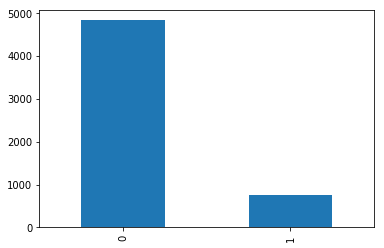

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
data['v1'].value_counts().plot(kind='bar')

In [87]:
ydata=data['v1']
xdata=data['v2']
len(xdata)  

5572

### 작업의 순서
1. 문장을 단어 단위로 토큰화
2. 단어 토큰에 대해 정수로 인코딩
   (데이터는 수치이어야 작업가능)
3. 

In [0]:
from keras.preprocessing.text import Tokenizer

#### 각 행에 대한 토큰화 수행

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(xdata) #각 행에 대한 토큰화가 수행된다  --> xdata에 대한 코퍼스 생성(중복은 없다)
                              # set()으로 데이터 저장하는 방법도 있지만, 토크나이저 함수를 통해 한큐에 해결가능하다

#### 정수로 인코딩 수행

In [0]:
word_index= tokenizer.word_index # 인덱스가 1번부터 시작함 
sequences=tokenizer.texts_to_sequences(xdata) # 정수로 인코딩 수행

In [91]:
sequences[:5]
len(word_index) # 8920은 vocab_size가 된다 / len(xdata)=5572 인데, 이것은 행의 갯수이다

8920

In [92]:
trainData=int(len(sequences)*0.8)
testData=int(len(sequences)-trainData)
trainData #4457
testData  #1115

1115

#### 메일 제목의 최대 길이 확인

In [93]:
max(len(d) for d in sequences)
 

# max(len(xdata))

189

#### 메일 제목 길이의 평균 구해보기

In [94]:
sum(map(len,sequences))/ len(sequences)

15.794867193108399

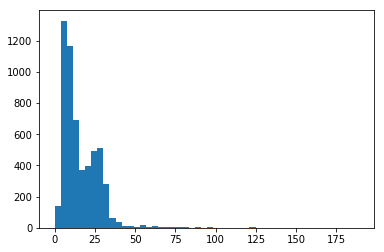

In [95]:
xdata=sequences
plt.hist([len(s) for s in xdata],bins=50)
plt.show()

In [0]:
# 가장 긴 메일의 길이 189
# 50미만이 대부분인데 이부분 전처리 해줄 것!!

In [0]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size=len(word_index)+1  #8920 +1 ->8921개로 계산하겠다

In [133]:
max_len=189
data=pad_sequences(xdata,maxlen=max_len)
data.shape

(5572, 189)

In [0]:
data[:5]
xtest=data[trainData:] # 뒷쪽 1115개
ytest=ydata[trainData:]
xtrain=data[:trainData] # 앞쪽 4457개
ytrain=ydata[:trainData]

#### MODEL DESIGN

In [0]:
model=Sequential()
model.add(Embedding(vocab_size,32)) #고차원의 데이터를 저차원으로 줄여주는 함수 8921을 32차원으로 바꿔줌
model.add(SimpleRNN(32)) # 히든 사이즈 32
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

#### MODEL FIT

In [139]:
session = tf.Session()

with session.as_default():
    with session.graph.as_default():
        model = Sequential()
        model.add(Embedding(vocab_size, 32)) # 고차원의 데이터를 저차원으로 
        model.add(SimpleRNN(32)) # hidden_size = 32
        model.add(Dense(1, activation="sigmoid"))
        
        model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy", 
              metrics=["acc"])
        
        history = model.fit(xtrain, ytrain, epochs=5, batch_size=60, validation_split=0.2)
        model.evaluate(xtest, ytest)[1]


Train on 3565 samples, validate on 892 samples
Epoch 1/5
3565/3565 [==============================] - 2s 696us/step - loss: 0.2857 - acc: 0.9032 - val_loss: 0.1538 - val_acc: 0.9529
Epoch 2/5
3565/3565 [==============================] - 2s 510us/step - loss: 0.0981 - acc: 0.9731 - val_loss: 0.0741 - val_acc: 0.9809
Epoch 3/5
3565/3565 [==============================] - 2s 520us/step - loss: 0.1438 - acc: 0.9442 - val_loss: 0.1820 - val_acc: 0.9294
Epoch 4/5
3565/3565 [==============================] - 2s 508us/step - loss: 0.0631 - acc: 0.9823 - val_loss: 0.0569 - val_acc: 0.9832
Epoch 5/5
1115/1115 [==============================] - 0s 204us/step


In [0]:
history=model.fit(xtrain, ytrain, epochs=5, batch_size=60, validation_split=0.2)
history

#### MODEL EVALUATION

In [0]:
model.evaluate(xtest,ytest)

In [0]:
epochs=range(1,len(history.history['acc']+1))
plt.plot(epochs,history['loss'])
plt.plot(epochs,history['val_loss'])
plt.show()